In [1]:
import pandas as pd

# Load the dataset
file_path = "household_power_consumption.txt"  # It's in the same folder
df = pd.read_csv(file_path, sep=';', low_memory=False)

# Basic check
print(df.shape)
print(df.columns)
df.head()


(2075259, 9)
Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [2]:
# Convert Date + Time into one datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Drop old columns (optional)
df.drop(columns=['Date', 'Time'], inplace=True)

# Reorder: Datetime column first
df = df[['Datetime'] + [col for col in df.columns if col != 'Datetime']]

# Check the result
df.head()


,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# Summary of data
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    object        
 2   Global_reactive_power  object        
 3   Voltage                object        
 4   Global_intensity       object        
 5   Sub_metering_1         object        
 6   Sub_metering_2         object        
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


Datetime                     0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
# Convert object columns to numeric format
cols_to_convert = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [6]:
# Check missing values again
df.isnull().sum()


Datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Confirm that missing values are removed
df.isnull().sum(), df.shape


(Datetime                 0
 Global_active_power      0
 Global_reactive_power    0
 Voltage                  0
 Global_intensity         0
 Sub_metering_1           0
 Sub_metering_2           0
 Sub_metering_3           0
 dtype: int64,
 (2049280, 8))

C:\Users\Vidhya R\AppData\Local\Temp\ipykernel_26308\788328870.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vidhya R\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vidhya R\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


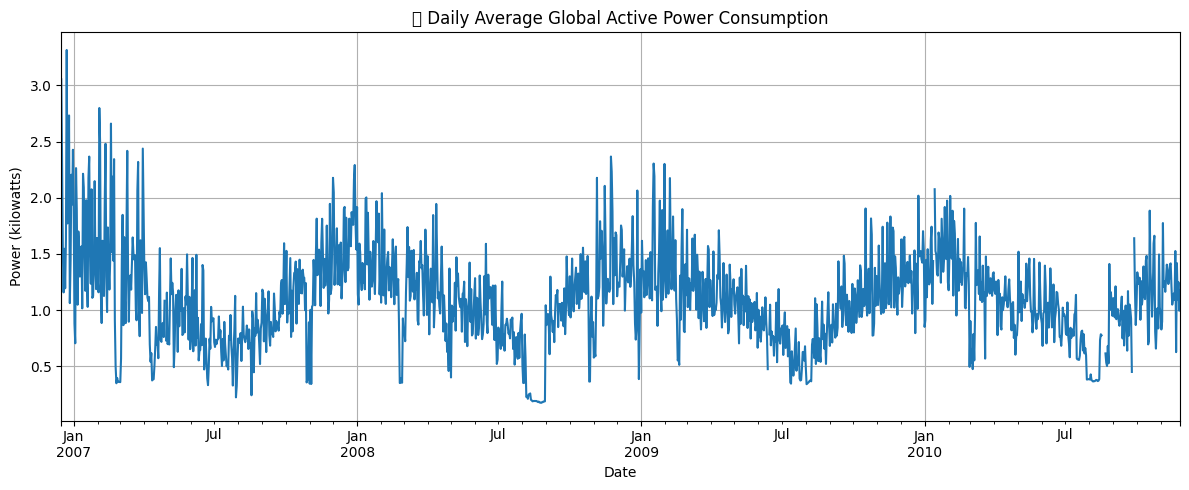

In [8]:
import matplotlib.pyplot as plt

# Plot daily average Global Active Power
df.set_index('Datetime')['Global_active_power'].resample('D').mean().plot(figsize=(12, 5))
plt.title("📈 Daily Average Global Active Power Consumption")
plt.xlabel("Date")
plt.ylabel("Power (kilowatts)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# Extract time-based features
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Weekday'] = df['Datetime'].dt.day_name()


C:\Users\Vidhya R\AppData\Local\Temp\ipykernel_26308\826374569.py:7: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vidhya R\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


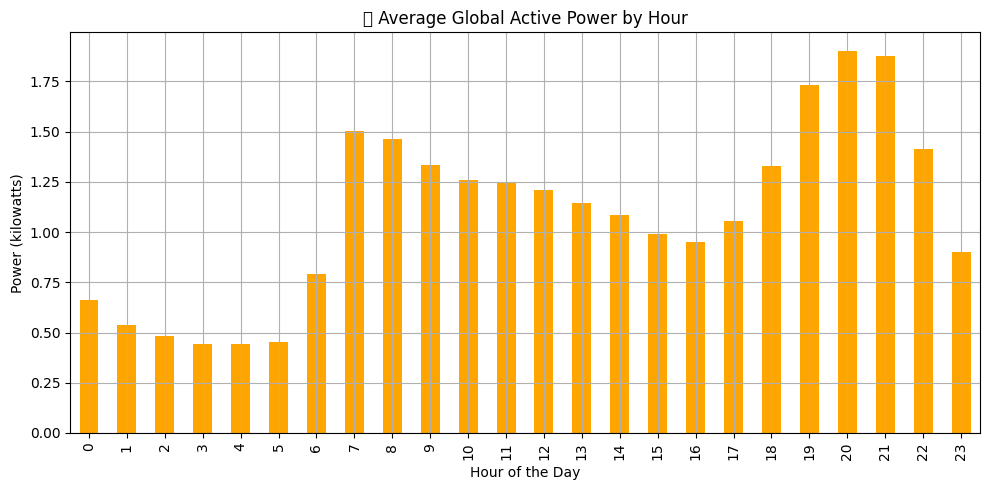

In [11]:
# Plot average Global Active Power per hour
df.groupby('Hour')['Global_active_power'].mean().plot(kind='bar', figsize=(10, 5), color='orange')
plt.title("🔌 Average Global Active Power by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Power (kilowatts)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Select input features (X) and target (y)
X = df[['Hour', 'Day', 'Month', 'Voltage',
        'Global_reactive_power', 'Global_intensity',
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

y = df['Global_active_power']


In [15]:
from sklearn.model_selection import train_test_split

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


ModuleNotFoundError: No module named 'sklearn'

In [16]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.7 MB 10.1 MB/s eta 0:00:01
   ---------------- ----------------------- 3.7/8.7 MB 10.4 MB/s eta 0:00:01
   --------------------- ------------------ 4.7/8.7 MB 7.7 MB/s eta 0:00:01
   ------------------------------ --------- 6.6/8.7 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 8.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.5 MB 7.1 MB/s eta 0:00:06
   -- ------------------------------------- 2.4/38.5 MB 6.7 MB/s eta 0:00:06
   ---- ----------------------------------- 3.9/38.5 MB 6.7 MB/s eta 0:00:06
   ----- ---------------------------------- 5.5/38.5 MB 6.8 MB/s eta 0:00:05
   ------- ------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Vidhya R\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
from sklearn.model_selection import train_test_split


In [18]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


NameError: name 'X_train_scaled' is not defined

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


NameError: name 'X_train' is not defined

In [20]:
# Input features
X = df[['Hour', 'Day', 'Month', 'Voltage',
        'Global_reactive_power', 'Global_intensity',
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Target variable
y = df['Global_active_power']


In [21]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"📊 Linear Regression Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


📊 Linear Regression Evaluation:
RMSE: 0.0403
MAE: 0.0257
R² Score: 0.9986


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)


KeyboardInterrupt: 

In [26]:
# Sample 100,000 rows from training data
sample_size = 100_000
X_train_sample = X_train_scaled[:sample_size]
y_train_sample = y_train[:sample_size]


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest on sample
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_sample, y_train_sample)

# Predict on full test data
y_pred_rf = rf_model.predict(X_test_scaled)


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"🌳 Random Forest Evaluation:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")


🌳 Random Forest Evaluation:
RMSE: 0.0327
MAE: 0.0176
R² Score: 0.9990


In [29]:
import joblib

# Save the trained model
joblib.dump(rf_model, "random_forest_energy_model.pkl")


['random_forest_energy_model.pkl']

C:\Users\Vidhya R\AppData\Local\Temp\ipykernel_26308\2948973003.py:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vidhya R\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


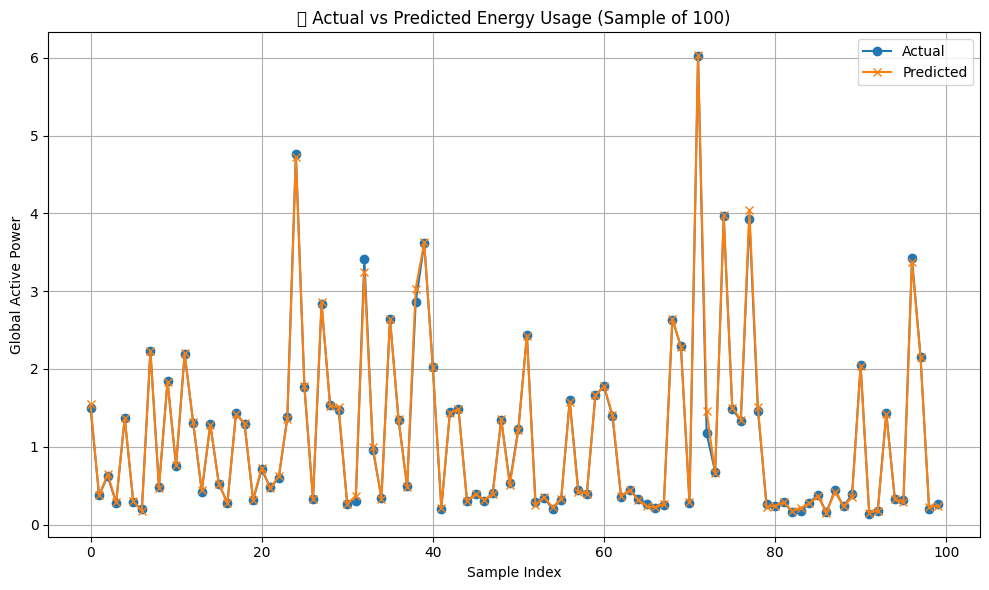

In [30]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values[:100], label="Actual", marker='o')
plt.plot(y_pred_rf[:100], label="Predicted", marker='x')
plt.title("🔍 Actual vs Predicted Energy Usage (Sample of 100)")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Vidhya R\AppData\Local\Temp\ipykernel_26308\2135580340.py:20: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Vidhya R\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


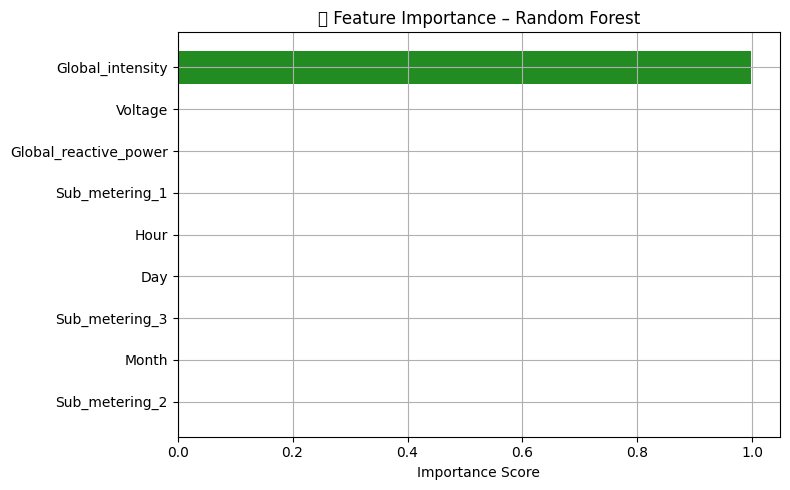

,Feature,Importance
5,Global_intensity,0.998143
3,Voltage,0.000535
4,Global_reactive_power,0.000505
6,Sub_metering_1,0.000190
0,Hour,0.000152
1,Day,0.000141
8,Sub_metering_3,0.000130
2,Month,0.000120
7,Sub_metering_2,0.000084


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create DataFrame for display
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='forestgreen')
plt.title("🌟 Feature Importance – Random Forest")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# Also show the importance table
importance_df


In [32]:
# Create a DataFrame of actual and predicted
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rf
})

# Save to CSV
results_df.to_csv("energy_predictions.csv", index=False)
print("✅ Predictions saved to 'energy_predictions.csv'")


✅ Predictions saved to 'energy_predictions.csv'
